# CREACIÓN DEL DATASET DE PREECLAMPSIA

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import plotly.express as px

from datetime import date
from datetime import datetime

In [2]:
observations = pd.read_csv('observations.csv')

In [4]:
encounters = pd.read_csv('encountersFiltered.csv')

In [608]:
encounters

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,antenatal_careplan,Month_Year
0,b485a224-78c9-3e6f-d18d-bf93764cc350,2024-02-08 14:59:14+00:00,2024-02-08 15:53:58+00:00,d778d02c-1b71-582e-0c64-e9ce715996fc,5fa5e611-be3d-3ebb-8f71-124325f6005f,236e8b0e-dba1-31a5-a5ac-f8b4dff4ecc6,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,wellness,162673000,General examination of patient (procedure),136.80,704.20,0.00,NaN,NaN,True,2024-02
1,dcedf098-d307-b5bc-0609-7acf86c52b02,2024-02-22 14:59:14+00:00,2024-02-22 18:40:30+00:00,d778d02c-1b71-582e-0c64-e9ce715996fc,9d989fcf-4ad9-3972-ada3-f275d967781e,dc678fc2-279d-3be8-be3f-b28dc4e317fb,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,ambulatory,185349003,Encounter for check up (procedure),85.55,3105.35,0.00,66383009.0,Gingivitis (disorder),True,2024-02
2,0a723901-5534-ddd3-dfd3-4bee300feb41,2024-09-19 14:59:14+00:00,2024-09-19 15:14:14+00:00,d778d02c-1b71-582e-0c64-e9ce715996fc,9d989fcf-4ad9-3972-ada3-f275d967781e,dc678fc2-279d-3be8-be3f-b28dc4e317fb,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,ambulatory,424441002,Prenatal initial visit (regime/therapy),142.58,55053.32,38144.95,72892002.0,Normal pregnancy (finding),True,2024-09
3,e839b319-4afe-187b-219c-374d7529e79b,2024-03-08 00:34:47+00:00,2024-03-08 01:34:47+00:00,958cbaed-4a32-40ff-f2ee-d55edc4f7611,f0e3e152-0b08-3819-b962-b043f63f6dc1,a8b071aa-59c6-3d54-b799-c28a697ed75f,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,emergency,50849002,Emergency room admission (procedure),146.18,146.18,0.00,110030002.0,Concussion injury of brain (disorder),False,2024-03
4,acae6c36-ec9e-d1f6-c95f-0d2d22580597,2024-04-19 00:34:47+00:00,2024-04-19 00:49:47+00:00,958cbaed-4a32-40ff-f2ee-d55edc4f7611,06cc2462-430f-3322-9c87-7e971125f510,e90cb995-6e59-31e7-9e03-512081d49303,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,ambulatory,185349003,Encounter for check up (procedure),85.55,85.55,0.00,62564004.0,Concussion with loss of consciousness (disorder),False,2024-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,0589ad67-8099-10de-c783-a96a00d29823,2024-03-18 23:58:38+00:00,2024-03-19 01:27:26+00:00,d722b722-99ef-37a7-f021-46a3afdca6d1,352f2e3b-0708-3eb4-9f7e-e73a685bf379,bf37e7f1-f7f7-320b-914c-b35197ad78f6,e03e23c9-4df1-3eb6-a62d-f70f02301496,ambulatory,185347001,Encounter for problem (procedure),85.55,516.95,0.00,6525002.0,Dependent drug abuse (disorder),False,2024-03
2150,f6711ef6-155d-a444-bba0-1c337b6d7112,2024-09-16 15:58:38+00:00,2024-09-16 16:56:33+00:00,d722b722-99ef-37a7-f021-46a3afdca6d1,352f2e3b-0708-3eb4-9f7e-e73a685bf379,bf37e7f1-f7f7-320b-914c-b35197ad78f6,e03e23c9-4df1-3eb6-a62d-f70f02301496,outpatient,308335008,Patient encounter procedure (procedure),142.58,573.98,0.00,389095005.0,Contraception care (regime/therapy),False,2024-09
2151,45048f97-3e00-518f-fa52-b0f6387327bf,2024-11-04 15:58:38+00:00,2024-11-04 16:13:38+00:00,d722b722-99ef-37a7-f021-46a3afdca6d1,352f2e3b-0708-3eb4-9f7e-e73a685bf379,bf37e7f1-f7f7-320b-914c-b35197ad78f6,e03e23c9-4df1-3eb6-a62d-f70f02301496,ambulatory,424441002,Prenatal initial visit (regime/therapy),142.58,45027.70,0.00,72892002.0,Normal pregnancy (finding),False,2024-11
2152,111b656b-cc8e-cb98-d5a4-fd0a06cb3932,2024-11-28 01:27:26+00:00,2024-11-28 10:27:26+00:00,d722b722-99ef-37a7-f021-46a3afdca6d1,7f32dd7d-5c35-3ddb-839b-8fbbb930d412,c8e8633b-4765-3f9d-923e-557e5001e34c,e03e23c9-4df1-3eb6-a62d-f70f02301496,emergency,50849002,Emergency room admission (procedure),146.18,146.18,0.00,55680006.0,Drug overdose,False,2024-11


In [610]:
patientsFiltered = pd.read_csv('patientsFiltered.csv')

In [612]:
patientsFiltered

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME,AGE
0,958cbaed-4a32-40ff-f2ee-d55edc4f7611,2003-10-13,NaN,999-46-5780,S99985773,X43751887X,Ms.,Sol312,Ciara810,Baumbach677,...,Massachusetts,Middlesex County,NaN,0,42.678887,-71.466652,83748.67,8386.12,847165,20
1,d778d02c-1b71-582e-0c64-e9ce715996fc,2004-12-09,NaN,999-44-8153,S99922963,X17785689X,Ms.,Irma773,Terresa418,Shields502,...,Massachusetts,Barnstable County,25001.0,2648,41.712246,-70.451110,80934.70,70863.00,62412,19
2,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,1991-09-05,NaN,999-31-9506,S99963368,X48163920X,Mrs.,Rocio28,Ángela136,Bermúdez789,...,Massachusetts,Hampden County,25013.0,1020,42.175006,-72.570417,10853.87,707739.51,1348,32
3,6da671b7-6462-2ced-5b86-5b0fced4308b,1974-02-04,NaN,999-31-4155,S99970004,X2187110X,Mrs.,Olympia319,Pamula578,Huels583,...,Massachusetts,Suffolk County,25025.0,2151,42.461726,-71.000002,186763.75,853299.76,26068,49
4,4551d27f-d5fc-2b84-1f53-74645d8ba7db,1994-12-08,NaN,999-91-4820,S99959729,X8802711X,Mrs.,Sheryll569,Serafina151,Rodriguez71,...,Massachusetts,Berkshire County,NaN,0,42.481856,-73.144685,115829.11,561024.32,78813,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,bbdaa7dc-6169-f296-701d-76f3d19fb981,1998-11-10,NaN,999-84-2267,S99951358,X29541100X,Ms.,Brynn361,Sanda877,Smitham825,...,Massachusetts,Barnstable County,25001.0,2540,41.567680,-70.624123,472272.32,16311.70,97670,25
202,f242c481-8b94-4e94-6fb8-7930fb8aed4a,2005-01-18,NaN,999-56-3167,S99939783,NaN,Ms.,Karma832,Krystina167,Wilkinson796,...,Massachusetts,Middlesex County,25017.0,1450,42.649156,-71.598716,102049.77,178772.30,170852,18
203,faa32210-cefe-9df6-bac3-ba195e4d7247,1977-05-07,NaN,999-15-6163,S99937013,X885379X,Mrs.,Irma773,Lupe126,Wuckert783,...,Massachusetts,Worcester County,25027.0,1005,42.452791,-72.125417,321220.88,957297.94,137638,46
204,3a4f7ecf-c03d-6d9d-af23-8ad9de7b7ca2,2002-09-11,NaN,999-32-5043,S99919772,X53412544X,Ms.,Candi549,NaN,Ratke343,...,Massachusetts,Suffolk County,25025.0,2118,42.377241,-71.122519,30529.65,372805.44,590061,21


In [614]:
preeclampsia = pd.DataFrame()

In [616]:
columns = ['PATIENT', 'DATE' 'VALUE',]
measures = [
    'Body mass index (BMI) [Ratio]', 
    'Systolic Blood Pressure', 
    'Diastolic Blood Pressure',  
    'Hemoglobin [Mass/volume] in Blood', 
    'Protein [Mass/volume] in Urine by Test strip'
]
preeclampsia= observations[observations['DESCRIPTION'].isin(measures)][['PATIENT', 'DATE', 'DESCRIPTION', 'VALUE']]

#remombramos colummnas
preeclampsia.rename(columns={
    'DESCRIPTION': 'Measure', 
    'VALUE': 'value'
}, inplace=True)


In [618]:
preeclampsia


,PATIENT,DATE,Measure,value
3,958cbaed-4a32-40ff-f2ee-d55edc4f7611,2015-11-02T23:58:08Z,Body mass index (BMI) [Ratio],19.5
5,958cbaed-4a32-40ff-f2ee-d55edc4f7611,2015-11-02T23:58:08Z,Diastolic Blood Pressure,81.0
6,958cbaed-4a32-40ff-f2ee-d55edc4f7611,2015-11-02T23:58:08Z,Systolic Blood Pressure,104.0
16,d778d02c-1b71-582e-0c64-e9ce715996fc,2015-12-24T14:59:14Z,Body mass index (BMI) [Ratio],22.1
19,d778d02c-1b71-582e-0c64-e9ce715996fc,2015-12-24T14:59:14Z,Diastolic Blood Pressure,74.0
...,...,...,...,...
280090,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,2022-12-26T00:29:08Z,Systolic Blood Pressure,139.0
280103,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,2022-12-26T00:29:08Z,Hemoglobin [Mass/volume] in Blood,15.0
280140,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,2024-01-01T00:29:08Z,Body mass index (BMI) [Ratio],30.0
280141,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,2024-01-01T00:29:08Z,Diastolic Blood Pressure,90.0


In [620]:
preeclampsia = preeclampsia.pivot_table(
    index = ['PATIENT'], 
    columns='Measure', 
    values='value', 
    aggfunc='first'
).reset_index()

#renombrar columnas para mayor claridad

preeclampsia.rename(columns={
    'Body mass index (BMI) [Ratio]':'BMI', 
    'Systolic Blood Pressure': 'SBP', 
    'Diastolic Blood Pressure': 'DBP', 
    'Protein [Mass/volume] in Urine by Test strip': 'Protein Uria', 
    'Hemoglobin [Mass/volume] in Blood': 'Hemoglobin'
}, inplace=True)

In [622]:
preeclampsia_filtered = preeclampsia.merge(patientsFiltered[['Id', 'AGE']], 
                                          left_on='PATIENT',
                                          right_on='Id', 
                                          how='inner')


In [624]:
preeclampsia_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PATIENT       206 non-null    object
 1   BMI           206 non-null    object
 2   DBP           206 non-null    object
 3   Hemoglobin    206 non-null    object
 4   Protein Uria  51 non-null     object
 5   SBP           206 non-null    object
 6   Id            206 non-null    object
 7   AGE           206 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 13.0+ KB


In [626]:
#conversión edad
preeclampsia_filtered['AGE'] = pd.to_numeric(preeclampsia_filtered['AGE'], errors = 'coerce')
preeclampsia_filtered['AGE'] = preeclampsia_filtered['AGE'].round(0).astype('Int64')

#conversión presión diastólica
preeclampsia_filtered['DBP'] = pd.to_numeric(preeclampsia_filtered['DBP'], errors = 'coerce')
preeclampsia_filtered['DBP'] = preeclampsia_filtered['DBP'].round(0).astype('Int64')


#conversión presión sistólica
preeclampsia_filtered['SBP'] = pd.to_numeric(preeclampsia_filtered['SBP'], errors = 'coerce')
preeclampsia_filtered['SBP'] = preeclampsia_filtered['SBP'].round(0).astype('Int64')

#conversión HDL
preeclampsia_filtered['Protein Uria'] = pd.to_numeric(preeclampsia_filtered['Protein Uria'], errors = 'coerce')

#conversión hemoglobin
preeclampsia_filtered['Hemoglobin'] = pd.to_numeric(preeclampsia_filtered['Hemoglobin'], errors = 'coerce')
preeclampsia_filtered['BMI'] = pd.to_numeric(preeclampsia_filtered['BMI'], errors = 'coerce')

In [628]:
preeclampsia_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PATIENT       206 non-null    object 
 1   BMI           206 non-null    float64
 2   DBP           206 non-null    Int64  
 3   Hemoglobin    206 non-null    float64
 4   Protein Uria  51 non-null     float64
 5   SBP           206 non-null    Int64  
 6   Id            206 non-null    object 
 7   AGE           206 non-null    Int64  
dtypes: Int64(3), float64(3), object(2)
memory usage: 13.6+ KB


In [630]:
equals = preeclampsia_filtered['PATIENT'] == preeclampsia_filtered['Id']
print(equals)

0      True
1      True
2      True
3      True
4      True
       ... 
201    True
202    True
203    True
204    True
205    True
Length: 206, dtype: bool


Eliminamos la columna PATIENT

In [633]:
preeclampsia_filtered.drop(columns=['PATIENT'])

,BMI,DBP,Hemoglobin,Protein Uria,SBP,Id,AGE
0,28.1,86,16.4,NaN,130,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,49
1,23.5,72,13.0,NaN,90,006a3718-02e0-4eee-deb2-27735709da2d,41
2,24.3,76,13.6,NaN,114,01370617-7f62-f405-7b16-2cbc16b2e250,30
3,27.7,73,16.4,NaN,105,03644468-51a0-fdc3-6f7b-45fd0fbd49c0,16
4,29.8,78,16.7,NaN,126,06b51fe9-0ee2-3e3c-1fd2-ed9e8501e197,41
...,...,...,...,...,...,...,...
201,28.3,68,11.1,NaN,101,f9b1f03d-84bb-d46d-a930-85f418055c12,37
202,27.9,102,12.2,NaN,142,faa32210-cefe-9df6-bac3-ba195e4d7247,46
203,23.2,81,12.9,NaN,119,fae833df-dd9f-4f5c-7ce2-e4ceffde1d02,31
204,27.7,102,13.7,NaN,136,fd67c5ed-a86f-c1d5-572a-88c1b973d6a9,42


### CÁLCULO SEMANA DEL EMBARAZO

Agrupamos a los pacientes por fecha para obtener la fecha mínima por paciente desde encounters, después restamos la fecha de la primera consulta de cada paciente a la fecha de sus encuentros y convertimos la diferencia en semanas. 

In [637]:
encounters

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,antenatal_careplan,Month_Year
0,b485a224-78c9-3e6f-d18d-bf93764cc350,2024-02-08 14:59:14+00:00,2024-02-08 15:53:58+00:00,d778d02c-1b71-582e-0c64-e9ce715996fc,5fa5e611-be3d-3ebb-8f71-124325f6005f,236e8b0e-dba1-31a5-a5ac-f8b4dff4ecc6,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,wellness,162673000,General examination of patient (procedure),136.80,704.20,0.00,NaN,NaN,True,2024-02
1,dcedf098-d307-b5bc-0609-7acf86c52b02,2024-02-22 14:59:14+00:00,2024-02-22 18:40:30+00:00,d778d02c-1b71-582e-0c64-e9ce715996fc,9d989fcf-4ad9-3972-ada3-f275d967781e,dc678fc2-279d-3be8-be3f-b28dc4e317fb,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,ambulatory,185349003,Encounter for check up (procedure),85.55,3105.35,0.00,66383009.0,Gingivitis (disorder),True,2024-02
2,0a723901-5534-ddd3-dfd3-4bee300feb41,2024-09-19 14:59:14+00:00,2024-09-19 15:14:14+00:00,d778d02c-1b71-582e-0c64-e9ce715996fc,9d989fcf-4ad9-3972-ada3-f275d967781e,dc678fc2-279d-3be8-be3f-b28dc4e317fb,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,ambulatory,424441002,Prenatal initial visit (regime/therapy),142.58,55053.32,38144.95,72892002.0,Normal pregnancy (finding),True,2024-09
3,e839b319-4afe-187b-219c-374d7529e79b,2024-03-08 00:34:47+00:00,2024-03-08 01:34:47+00:00,958cbaed-4a32-40ff-f2ee-d55edc4f7611,f0e3e152-0b08-3819-b962-b043f63f6dc1,a8b071aa-59c6-3d54-b799-c28a697ed75f,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,emergency,50849002,Emergency room admission (procedure),146.18,146.18,0.00,110030002.0,Concussion injury of brain (disorder),False,2024-03
4,acae6c36-ec9e-d1f6-c95f-0d2d22580597,2024-04-19 00:34:47+00:00,2024-04-19 00:49:47+00:00,958cbaed-4a32-40ff-f2ee-d55edc4f7611,06cc2462-430f-3322-9c87-7e971125f510,e90cb995-6e59-31e7-9e03-512081d49303,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,ambulatory,185349003,Encounter for check up (procedure),85.55,85.55,0.00,62564004.0,Concussion with loss of consciousness (disorder),False,2024-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,0589ad67-8099-10de-c783-a96a00d29823,2024-03-18 23:58:38+00:00,2024-03-19 01:27:26+00:00,d722b722-99ef-37a7-f021-46a3afdca6d1,352f2e3b-0708-3eb4-9f7e-e73a685bf379,bf37e7f1-f7f7-320b-914c-b35197ad78f6,e03e23c9-4df1-3eb6-a62d-f70f02301496,ambulatory,185347001,Encounter for problem (procedure),85.55,516.95,0.00,6525002.0,Dependent drug abuse (disorder),False,2024-03
2150,f6711ef6-155d-a444-bba0-1c337b6d7112,2024-09-16 15:58:38+00:00,2024-09-16 16:56:33+00:00,d722b722-99ef-37a7-f021-46a3afdca6d1,352f2e3b-0708-3eb4-9f7e-e73a685bf379,bf37e7f1-f7f7-320b-914c-b35197ad78f6,e03e23c9-4df1-3eb6-a62d-f70f02301496,outpatient,308335008,Patient encounter procedure (procedure),142.58,573.98,0.00,389095005.0,Contraception care (regime/therapy),False,2024-09
2151,45048f97-3e00-518f-fa52-b0f6387327bf,2024-11-04 15:58:38+00:00,2024-11-04 16:13:38+00:00,d722b722-99ef-37a7-f021-46a3afdca6d1,352f2e3b-0708-3eb4-9f7e-e73a685bf379,bf37e7f1-f7f7-320b-914c-b35197ad78f6,e03e23c9-4df1-3eb6-a62d-f70f02301496,ambulatory,424441002,Prenatal initial visit (regime/therapy),142.58,45027.70,0.00,72892002.0,Normal pregnancy (finding),False,2024-11
2152,111b656b-cc8e-cb98-d5a4-fd0a06cb3932,2024-11-28 01:27:26+00:00,2024-11-28 10:27:26+00:00,d722b722-99ef-37a7-f021-46a3afdca6d1,7f32dd7d-5c35-3ddb-839b-8fbbb930d412,c8e8633b-4765-3f9d-923e-557e5001e34c,e03e23c9-4df1-3eb6-a62d-f70f02301496,emergency,50849002,Emergency room admission (procedure),146.18,146.18,0.00,55680006.0,Drug overdose,False,2024-11


In [639]:
# Obtenemos primera fecha consulta paciente

firstVisit = encounters.groupby('PATIENT')['START'].min().reset_index()
firstVisit = firstVisit.rename(columns={'START':'FirstVisitDate'})

#Unimos la fecha de la primera consulta con preeclampsia
encounters = encounters.merge(firstVisit, on='PATIENT', how='left')

#Calculamos edad gestacional
encounters['START'] = pd.to_datetime(encounters['START'], errors='coerce')
encounters['FirstVisitDate'] = pd.to_datetime(encounters['FirstVisitDate'], errors='coerce')

preeclampsia_filtered['GestationalAge'] = (
    (encounters['START'] - encounters['FirstVisitDate']).dt.days /7
).astype(int)



## ANÁLISIS ESTADÍSTICO DEL DATASET

In [646]:
preeclampsia_filtered.describe()

,BMI,DBP,Hemoglobin,Protein Uria,SBP,AGE,GestationalAge
count,206.000000,206.0,206.000000,51.000000,206.0,206.0,206.000000
mean,25.716019,80.354369,14.553398,60.366667,120.703883,34.320388,20.941748
std,5.263624,9.235438,1.857552,93.935243,15.075895,10.811659,15.487729
min,13.900000,56.0,7.600000,0.300000,88.0,16.0,0.000000
25%,22.100000,74.0,13.025000,4.750000,111.0,25.0,6.000000
50%,27.000000,80.0,14.600000,9.100000,121.5,36.0,20.000000
75%,29.275000,86.0,16.300000,111.650000,131.75,43.0,35.000000
max,49.900000,106.0,17.500000,296.300000,161.0,58.0,50.000000


In [650]:
preeclampsia_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PATIENT         206 non-null    object 
 1   BMI             206 non-null    float64
 2   DBP             206 non-null    Int64  
 3   Hemoglobin      206 non-null    float64
 4   Protein Uria    51 non-null     float64
 5   SBP             206 non-null    Int64  
 6   Id              206 non-null    object 
 7   AGE             206 non-null    Int64  
 8   GestationalAge  206 non-null    int32  
dtypes: Int64(3), float64(3), int32(1), object(2)
memory usage: 14.4+ KB


In [153]:
def verifica_rango(dataframe):
    """
    Función que comprueba si los valores se encuentran en el rango fisiológico compatible con la vida humana
    devuelve una serie de comentarios diciendo que valores se encuentran dentro del rango y cuáles no. 
    """
    
    rangos_limites = {
        'SBP': (70,200),
        'DBP':(40,120),
        'Hemoglobin': (11.6,15),
        'Protein Uria': (0.0, 30.0),
        'BMI':(18.5, 30)
    }
    
    results= {}
    for col, (min_val, max_val) in rangos_limites.items():
        if col in dataframe.columns:
            
            validos = dataframe[(dataframe[col] >= min_val) & (dataframe[col] <= max_val)]
            fuera_rango = len(dataframe) - len(validos)
            results[col] = {
                'val_fuera_rango':fuera_rango,
                'total_filas': len(dataframe), 
                'valores_validos': len(validos)
            }

    for col, info in results.items():
        print(f"- Valores fuera del rango de {col}:{info['val_fuera_rango']}\n")
        print(f"- Total valores de {col}:{info['total_filas']}\n")
        print(f"- Valores validos de {col}: {info['valores_validos']}\n")
    

In [655]:
verifica_rango(preeclampsia_filtered)

- Valores fuera del rango de SBP:0

- Total valores de SBP:206

- Valores validos de SBP: 206

- Valores fuera del rango de DBP:0

- Total valores de DBP:206

- Valores validos de DBP: 206

- Valores fuera del rango de Hemoglobin:98

- Total valores de Hemoglobin:206

- Valores validos de Hemoglobin: 108

- Valores fuera del rango de Protein Uria:169

- Total valores de Protein Uria:206

- Valores validos de Protein Uria: 37

- Valores fuera del rango de BMI:47

- Total valores de BMI:206

- Valores validos de BMI: 159



In [155]:
def ajustar_valores(df, rangos):
    """
    Función que trunca los valores que se pasan del rango al máximo o mínimo del rango fisiológico. 
    """
    for col, (min_val, max_val) in rangos.items():
        if col in df.columns:
            df[col] = df[col].apply(
                lambda x: max(min(x, max_val), min_val) if not pd.isnull(x) else x
            )
    return df

In [662]:
rangos_limites = {
        'SBP': (70,200),
        'DBP':(40,120),
        'Hemoglobin': (11.6,15),
        'Protein Uria': (0.0, 30.0),
        'BMI':(18.5, 30)
    }
preeclampsia_filtered = ajustar_valores(preeclampsia_filtered, rangos_limites)

In [664]:
verifica_rango(preeclampsia_filtered)

- Valores fuera del rango de SBP:0

- Total valores de SBP:206

- Valores validos de SBP: 206

- Valores fuera del rango de DBP:0

- Total valores de DBP:206

- Valores validos de DBP: 206

- Valores fuera del rango de Hemoglobin:0

- Total valores de Hemoglobin:206

- Valores validos de Hemoglobin: 206

- Valores fuera del rango de Protein Uria:155

- Total valores de Protein Uria:206

- Valores validos de Protein Uria: 51

- Valores fuera del rango de BMI:0

- Total valores de BMI:206

- Valores validos de BMI: 206



### INSERCIÓN  DE VALORES EN COLUMNA PROTEIN URIA

In [669]:
from sklearn.impute import KNNImputer

columns_to_impute = ['Protein Uria']

imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputed_data = imputer.fit_transform(preeclampsia_filtered[columns_to_impute])

preeclampsia_filtered[columns_to_impute] = imputed_data
print(preeclampsia_filtered[columns_to_impute].isna().sum())

Protein Uria    0
dtype: int64


In [671]:
preeclampsia_filtered.describe()

,BMI,DBP,Hemoglobin,Protein Uria,SBP,AGE,GestationalAge
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.0,206.000000
mean,25.525243,80.354369,14.011165,13.198039,120.703883,34.320388,20.941748
std,4.060283,9.235438,1.143261,5.439902,15.075895,10.811659,15.487729
min,18.500000,56.000000,11.600000,0.300000,88.000000,16.0,0.000000
25%,22.100000,74.000000,13.025000,13.198039,111.000000,25.0,6.000000
50%,27.000000,80.000000,14.600000,13.198039,121.500000,36.0,20.000000
75%,29.275000,86.000000,15.000000,13.198039,131.750000,43.0,35.000000
max,30.000000,106.000000,15.000000,30.000000,161.000000,58.0,50.000000


Tenemos valores de semanas de e¡gestación demasiado prolongadas (50 semanas no es posible)

In [674]:
# Filtramos valores fuera del rango normal (0 a 42 semanas)

preeclampsia_filtered[
    (preeclampsia_filtered['GestationalAge'] >= 0) & 
    (preeclampsia_filtered['GestationalAge'] <=42)
]

,PATIENT,BMI,DBP,Hemoglobin,Protein Uria,SBP,Id,AGE,GestationalAge
0,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,28.1,86,15.0,13.198039,130,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,49,0
1,006a3718-02e0-4eee-deb2-27735709da2d,23.5,72,13.0,13.198039,90,006a3718-02e0-4eee-deb2-27735709da2d,41,2
2,01370617-7f62-f405-7b16-2cbc16b2e250,24.3,76,13.6,13.198039,114,01370617-7f62-f405-7b16-2cbc16b2e250,30,32
3,03644468-51a0-fdc3-6f7b-45fd0fbd49c0,27.7,73,15.0,13.198039,105,03644468-51a0-fdc3-6f7b-45fd0fbd49c0,16,0
4,06b51fe9-0ee2-3e3c-1fd2-ed9e8501e197,29.8,78,15.0,13.198039,126,06b51fe9-0ee2-3e3c-1fd2-ed9e8501e197,41,6
...,...,...,...,...,...,...,...,...,...
201,f9b1f03d-84bb-d46d-a930-85f418055c12,28.3,68,11.6,13.198039,101,f9b1f03d-84bb-d46d-a930-85f418055c12,37,18
202,faa32210-cefe-9df6-bac3-ba195e4d7247,27.9,102,12.2,13.198039,142,faa32210-cefe-9df6-bac3-ba195e4d7247,46,19
203,fae833df-dd9f-4f5c-7ce2-e4ceffde1d02,23.2,81,12.9,13.198039,119,fae833df-dd9f-4f5c-7ce2-e4ceffde1d02,31,19
204,fd67c5ed-a86f-c1d5-572a-88c1b973d6a9,27.7,102,13.7,13.198039,136,fd67c5ed-a86f-c1d5-572a-88c1b973d6a9,42,19


In [678]:
preeclampsia_filtered['GestationalAge'] = preeclampsia_filtered['GestationalAge'].clip(upper=42)

In [680]:
preeclampsia_filtered.describe()

,BMI,DBP,Hemoglobin,Protein Uria,SBP,AGE,GestationalAge
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.0,206.000000
mean,25.525243,80.354369,14.011165,13.198039,120.703883,34.320388,20.601942
std,4.060283,9.235438,1.143261,5.439902,15.075895,10.811659,14.959027
min,18.500000,56.000000,11.600000,0.300000,88.000000,16.0,0.000000
25%,22.100000,74.000000,13.025000,13.198039,111.000000,25.0,6.000000
50%,27.000000,80.000000,14.600000,13.198039,121.500000,36.0,20.000000
75%,29.275000,86.000000,15.000000,13.198039,131.750000,43.0,35.000000
max,30.000000,106.000000,15.000000,30.000000,161.000000,58.0,42.000000


## CORRELACIONES ENTRE VARIABLES

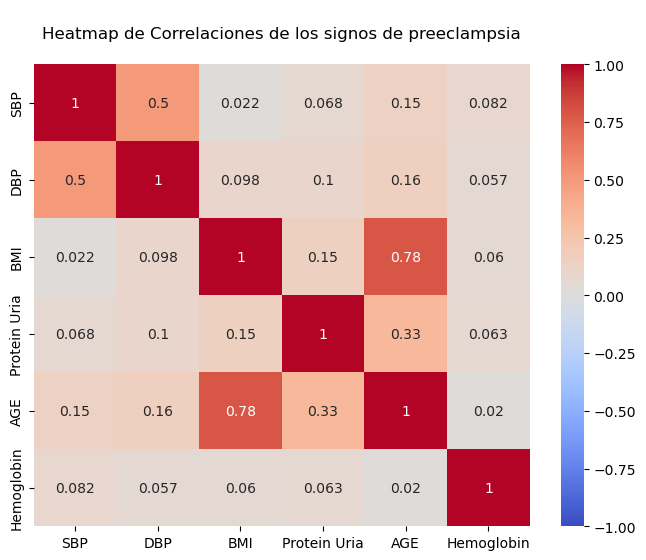

In [685]:
corr_matrix = preeclampsia_filtered[['SBP', 'DBP', 'BMI', 'Protein Uria', 'AGE', 'Hemoglobin']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("\nHeatmap de Correlaciones de los signos de preeclampsia\n")
plt.show()

La edad y el peso tiene una fuerte correlación positiva, cosa que es de esperar. 

Aunque la relación es débil, un BMI más alto podría estar asociado con un mayor riesgo de proteínas en orina, lo cual es coherente con el impacto de la obesidad en las complicaciones metabólicas.

Aunque leve, hay una tendencia a que la presión sistólica aumente con la edad, lo cual está alineado con el riesgo de hipertensión en edades avanzadas.

In [696]:
preeclampsia_filtered.to_csv('preeclampsiaEncounter.csv', index=False)

# CASO LÍMITE PACIENTES CON HIPERTENSIÓN 

In [7]:
careplans = pd.read_csv('careplans.csv')
patients = pd.read_csv('patients.csv')

In [9]:
hypertensionPlan = careplans.query("CODE == 443402002")

In [11]:
hypertensionPlan['START'] = pd.to_datetime(hypertensionPlan['START'], errors = 'coerce')

C:\Users\virginia.anton\AppData\Local\Temp\ipykernel_24784\4028016385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypertensionPlan['START'] = pd.to_datetime(hypertensionPlan['START'], errors = 'coerce')


In [13]:
filtered_hypertensionPlan = hypertensionPlan[hypertensionPlan['START'] >= '2024-01-01']

In [15]:
filtered_hypertensionPlan

,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
1301,a99e64ee-915b-e31d-2c15-71bf433dd6c3,2024-02-21,NaN,aee8d390-59e7-bd4e-52ff-99e288d6e988,56594fb5-eecf-11de-c74f-043c7f56c95a,443402002,Lifestyle education regarding hypertension (pr...,59621000.0,Essential hypertension (disorder)


Solo hay una persona, así que vamos a cambiar el año para que sea en 2024.

In [18]:

hypertensionPlan['START'] = hypertensionPlan['START'].apply(lambda x: pd.Timestamp(year=2024, month=x.month, day=x.day) if pd.notna(x) else x)

C:\Users\virginia.anton\AppData\Local\Temp\ipykernel_24784\4217199683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypertensionPlan['START'] = hypertensionPlan['START'].apply(lambda x: pd.Timestamp(year=2024, month=x.month, day=x.day) if pd.notna(x) else x)


In [20]:
hypertensionPlan

,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
23,6c360a6c-8e1d-4a26-9cf7-e5eb2213ff2f,2024-02-23,NaN,4551d27f-d5fc-2b84-1f53-74645d8ba7db,06b87594-ad64-f72d-bedc-d603c98039a4,443402002,Lifestyle education regarding hypertension (pr...,59621000.0,Essential hypertension (disorder)
44,ef226aca-e33f-cea0-bdaf-abccd3732899,2024-12-20,NaN,33be3bda-c4b3-566f-d32f-0a4a5ed96c05,6748ab52-5138-6f4f-2e6f-a59841945e15,443402002,Lifestyle education regarding hypertension (pr...,59621000.0,Essential hypertension (disorder)
52,e4a416cc-7f55-8ab6-46ef-7ddd488c74aa,2024-01-07,NaN,bbdac5e5-03f7-1e49-16f8-099031ab7038,2d27a197-9a60-f585-54ba-8d3e67b43472,443402002,Lifestyle education regarding hypertension (pr...,59621000.0,Essential hypertension (disorder)
69,5afe23f9-edc6-1db4-d47f-77e50e9af9ef,2024-07-27,NaN,b7e7db70-97b7-aee2-c7e5-8956ea690d81,63fc4d3f-44e4-d624-4185-d891aa66592e,443402002,Lifestyle education regarding hypertension (pr...,59621000.0,Essential hypertension (disorder)
98,2267c3cd-ed0d-1471-511c-b71683c5216e,2024-04-26,NaN,e741ffe4-2b27-c8b2-4d6d-7c351adca4c5,c331e5ad-24c3-2b19-85d9-91e58f3c353a,443402002,Lifestyle education regarding hypertension (pr...,59621000.0,Essential hypertension (disorder)
...,...,...,...,...,...,...,...,...,...
1748,1a1dbd2a-f9a5-a515-d66c-5cbe648670d6,2024-05-13,NaN,faa32210-cefe-9df6-bac3-ba195e4d7247,8f914f3a-3326-7fbb-4609-c62b928780ae,443402002,Lifestyle education regarding hypertension (pr...,59621000.0,Essential hypertension (disorder)
1760,8cbf83e6-3786-8fc1-22e7-e091fbb89e18,2024-12-23,NaN,d7e9f522-3e17-4dc1-59b2-7506042297a2,e19ef87a-74d3-f17b-2376-598e944e93c4,443402002,Lifestyle education regarding hypertension (pr...,59621000.0,Essential hypertension (disorder)
1770,ae689e79-a5be-cc0e-06a0-a778a73f33cc,2024-03-07,NaN,40c7d100-7a0c-3425-53ba-50908c48948e,2461bb4b-8f32-75b4-108d-25f39b836327,443402002,Lifestyle education regarding hypertension (pr...,59621000.0,Essential hypertension (disorder)
1779,cf8b897c-77f5-89f8-2c34-d19fa32d2e73,2024-01-14,NaN,71163ca7-8a46-ca76-782a-1ddab03665fd,839c3ddf-3813-954b-108d-1411d82d9215,443402002,Lifestyle education regarding hypertension (pr...,59621000.0,Essential hypertension (disorder)


In [22]:
startNullCount = hypertensionPlan['START'].isnull().sum()
print(f"Valores nulos en la columna START: {startNullCount} de {hypertensionPlan['START'].shape[0]}")

Valores nulos en la columna START: 0 de 100


In [24]:
hypertensionPlan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 23 to 1820
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Id                 100 non-null    object        
 1   START              100 non-null    datetime64[ns]
 2   STOP               0 non-null      object        
 3   PATIENT            100 non-null    object        
 4   ENCOUNTER          100 non-null    object        
 5   CODE               100 non-null    int64         
 6   DESCRIPTION        100 non-null    object        
 7   REASONCODE         100 non-null    float64       
 8   REASONDESCRIPTION  100 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 7.8+ KB


## FILTRO DE PACIENTES CON MAYOR NÚMERO DE VISITAS

Como es un seguimiento a lo largo de los 9 meses de embarazo, queremos seguir viendo a cuántas consultas acuden pese a que en la columna 'STOP' no aparezca el fin del tratamiento

In [28]:
encounters = pd.read_csv('encounters.csv')

In [30]:
# filtramos a las pacientes selecccionadas. 
encounters['HYPERTENSION_plan'] = encounters['PATIENT'].isin(hypertensionPlan['PATIENT'])

In [32]:
encounters.query("HYPERTENSION_plan == True")

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,HYPERTENSION_plan
217,f73913f2-9289-7c77-1b31-0d55f157b008,1999-10-03T02:34:56Z,1999-10-03T02:49:56Z,4551d27f-d5fc-2b84-1f53-74645d8ba7db,f43f97f2-af04-3ed0-a42e-3681718cc9b2,21d733b6-4fd9-35be-8361-3f490931c8c9,e03e23c9-4df1-3eb6-a62d-f70f02301496,ambulatory,185345009,Encounter for symptom (procedure),85.55,92.93,0.00,36971009.0,Sinusitis (disorder),True
218,01f82d78-db39-487d-0db0-3d2d22bd5e69,2012-01-26T06:34:56Z,2012-01-26T07:01:38Z,4551d27f-d5fc-2b84-1f53-74645d8ba7db,486bf543-9696-3d51-aa70-28a3044ce490,49ae2ea8-16d8-37f2-95e3-41c037debbba,d31fccc3-1767-390d-966a-22a5156f4219,wellness,410620009,Well child visit (procedure),136.80,919.90,0.00,NaN,NaN,True
219,b28dba34-3af8-2100-db0c-91195a3fb9a8,2013-01-31T06:34:56Z,2013-01-31T07:10:53Z,4551d27f-d5fc-2b84-1f53-74645d8ba7db,486bf543-9696-3d51-aa70-28a3044ce490,49ae2ea8-16d8-37f2-95e3-41c037debbba,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.80,1023.74,0.00,NaN,NaN,True
220,081cf9e8-a2ce-0a92-e2e2-759d648ebc1c,2014-02-06T06:34:56Z,2014-02-06T07:06:39Z,4551d27f-d5fc-2b84-1f53-74645d8ba7db,486bf543-9696-3d51-aa70-28a3044ce490,49ae2ea8-16d8-37f2-95e3-41c037debbba,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.80,704.20,0.00,NaN,NaN,True
221,e072ced9-7d66-37b3-6bd0-9ab1702ac6fd,2014-02-13T06:34:56Z,2014-02-13T06:49:56Z,4551d27f-d5fc-2b84-1f53-74645d8ba7db,f43f97f2-af04-3ed0-a42e-3681718cc9b2,21d733b6-4fd9-35be-8361-3f490931c8c9,d31fccc3-1767-390d-966a-22a5156f4219,outpatient,185347001,Encounter for problem (procedure),85.55,85.55,0.00,82423001.0,Chronic pain (finding),True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32745,4c2c13fc-389c-5305-dfe8-84cb7ff2f300,2022-12-26T00:29:08Z,2022-12-26T01:02:33Z,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,e5b9db6a-8dd8-3622-b9ce-3dc593e111d1,bee22fdb-0ccc-32aa-80d3-f9e677dc8d4f,df166300-5a78-3502-a46a-832842197811,wellness,162673000,General examination of patient (procedure),136.80,853.36,753.36,NaN,NaN,True
32746,9827a5ac-0451-516d-031b-eab536d839d2,2023-09-25T05:29:08Z,2023-09-25T05:44:08Z,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,c7542447-e06e-32cb-b6db-243c23a0dbc2,a8287324-f8d6-31e1-beae-004b795fa507,df166300-5a78-3502-a46a-832842197811,ambulatory,185345009,Encounter for symptom (procedure),85.55,85.55,35.55,75498004.0,Acute bacterial sinusitis (disorder),True
32747,19ab31ad-8140-02fb-d3d9-04ef7225ef99,2023-10-28T05:29:08Z,2023-10-28T05:44:08Z,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,c7542447-e06e-32cb-b6db-243c23a0dbc2,a8287324-f8d6-31e1-beae-004b795fa507,df166300-5a78-3502-a46a-832842197811,ambulatory,185345009,Encounter for symptom (procedure),85.55,92.93,42.93,75498004.0,Acute bacterial sinusitis (disorder),True
32748,b8bdd2bf-b6e0-85d8-2f13-fac2c1bbcdcf,2024-01-01T00:29:08Z,2024-01-01T01:14:49Z,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,e5b9db6a-8dd8-3622-b9ce-3dc593e111d1,bee22fdb-0ccc-32aa-80d3-f9e677dc8d4f,df166300-5a78-3502-a46a-832842197811,wellness,162673000,General examination of patient (procedure),136.80,1632.30,1532.30,NaN,NaN,True


Como hemos cambiado la fecha en careplans, debido a que sólo había un paciente registrada en 2024, haremos lo mismo para este dataset.para este dataset.

In [35]:
encounters['START'] = pd.to_datetime(encounters['START'], errors='coerce')
encounters['STOP'] = pd.to_datetime(encounters['STOP'], errors='coerce')

encounters['START'] = encounters['START'].apply(lambda x: pd.Timestamp(year=2024, month=x.month, day=x.day) if pd.notna(x) else x)
encounters['STOP'] = encounters['STOP'].apply(lambda x: pd.Timestamp(year=2024, month=x.month, day=x.day) if pd.notna(x) else x)

Nos hemos quedado con las pacientes que están en un tratamiento de hipertensión. Pero sólo nos interesan las visitas relacionadas con el manejo de la deiabetes y del cuidado perinatal. Filtramos para sólo quedarnos con este tipo de visitas (buscamos que acudan a visitas sobre el embarazo).

In [38]:
encounters.query("REASONCODE == 72892002")

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,HYPERTENSION_plan
41,0a723901-5534-ddd3-dfd3-4bee300feb41,2024-09-19,2024-09-19,d778d02c-1b71-582e-0c64-e9ce715996fc,9d989fcf-4ad9-3972-ada3-f275d967781e,dc678fc2-279d-3be8-be3f-b28dc4e317fb,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,ambulatory,424441002,Prenatal initial visit (regime/therapy),142.58,55053.32,38144.95,72892002.0,Normal pregnancy (finding),False
51,72f112e5-5128-a9fb-7eb1-c4965f071a19,2024-12-02,2024-12-03,958cbaed-4a32-40ff-f2ee-d55edc4f7611,06cc2462-430f-3322-9c87-7e971125f510,e90cb995-6e59-31e7-9e03-512081d49303,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,ambulatory,424441002,Prenatal initial visit (regime/therapy),142.58,8974.10,1728.06,72892002.0,Normal pregnancy (finding),False
52,31273ce2-5399-dd91-60e2-b194ff5fb6e4,2024-12-09,2024-12-10,958cbaed-4a32-40ff-f2ee-d55edc4f7611,06cc2462-430f-3322-9c87-7e971125f510,e90cb995-6e59-31e7-9e03-512081d49303,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,ambulatory,270427003,Patient-initiated encounter (procedure),85.55,4444.98,2666.99,72892002.0,Normal pregnancy (finding),False
53,eec0010f-e79c-f8ce-0f40-4bfda83aa93c,2024-10-17,2024-10-17,d778d02c-1b71-582e-0c64-e9ce715996fc,9d989fcf-4ad9-3972-ada3-f275d967781e,dc678fc2-279d-3be8-be3f-b28dc4e317fb,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,ambulatory,424619006,Prenatal visit (regime/therapy),142.58,10091.82,10091.82,72892002.0,Normal pregnancy (finding),False
54,e7ed1b59-5a3a-21db-2c6a-694304854ba4,2024-11-14,2024-11-14,d778d02c-1b71-582e-0c64-e9ce715996fc,9d989fcf-4ad9-3972-ada3-f275d967781e,dc678fc2-279d-3be8-be3f-b28dc4e317fb,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,ambulatory,424619006,Prenatal visit (regime/therapy),142.58,8548.56,8548.56,72892002.0,Normal pregnancy (finding),False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32710,fa6b18e1-c89b-a69e-ef37-1b192b1e95af,2024-11-05,2024-11-05,c98c8053-9db4-940c-60f8-afc6f27d26a1,b9e35b8a-9831-32d8-a6dc-d7a546c126b0,6d1a3076-63f8-3c60-b49e-33886efca42a,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,ambulatory,424619006,Prenatal visit (regime/therapy),142.58,12745.22,3990.73,72892002.0,Normal pregnancy (finding),False
32712,a0ce1c58-8886-73d4-c291-db93b58e1253,2024-12-03,2024-12-03,c98c8053-9db4-940c-60f8-afc6f27d26a1,b9e35b8a-9831-32d8-a6dc-d7a546c126b0,6d1a3076-63f8-3c60-b49e-33886efca42a,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,ambulatory,424619006,Prenatal visit (regime/therapy),142.58,4665.96,4665.96,72892002.0,Normal pregnancy (finding),False
32713,8459c0f7-1d7d-591b-e62d-4254283cbf38,2024-12-31,2024-12-31,c98c8053-9db4-940c-60f8-afc6f27d26a1,b9e35b8a-9831-32d8-a6dc-d7a546c126b0,6d1a3076-63f8-3c60-b49e-33886efca42a,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,ambulatory,424619006,Prenatal visit (regime/therapy),142.58,6200.68,6200.68,72892002.0,Normal pregnancy (finding),False
32714,34f46fad-74b9-9d97-6c7c-26e7727acf3d,2024-01-28,2024-01-28,c98c8053-9db4-940c-60f8-afc6f27d26a1,b9e35b8a-9831-32d8-a6dc-d7a546c126b0,6d1a3076-63f8-3c60-b49e-33886efca42a,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,ambulatory,424619006,Prenatal visit (regime/therapy),142.58,18478.80,18478.80,72892002.0,Normal pregnancy (finding),False


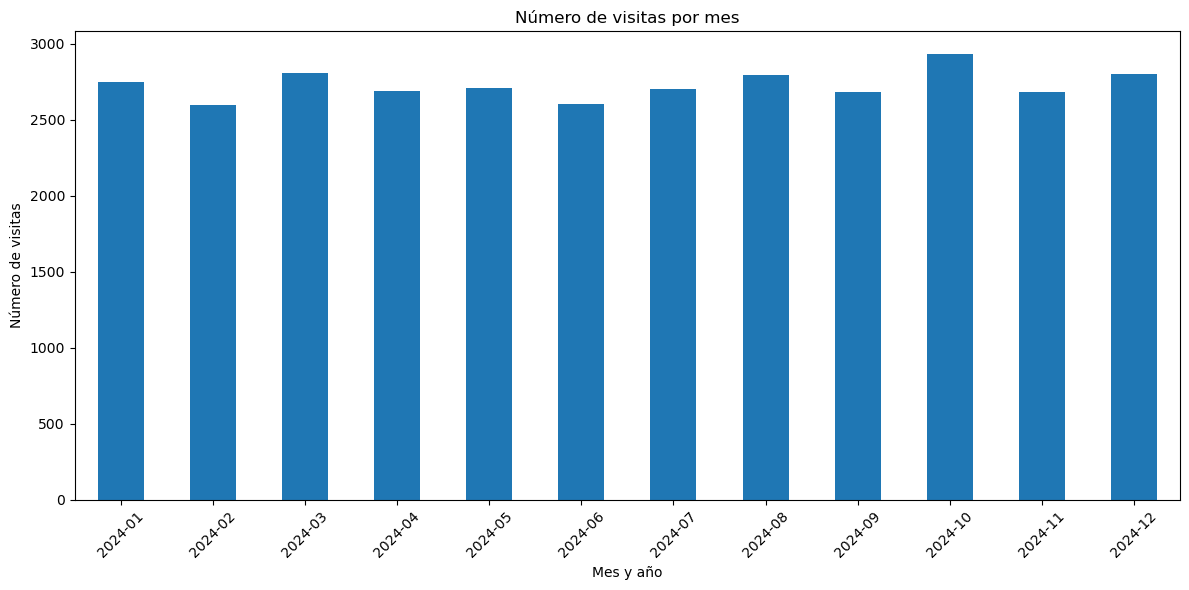

In [40]:
#creamos una columna auxiliar por mes y año:
encounters['Month_Year'] = encounters['START'].dt.to_period('M')

#número de visitas por mes:
monthly_visitshipertension = encounters['Month_Year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
monthly_visitshipertension.plot(kind='bar')
plt.title('Número de visitas por mes')
plt.xlabel('Mes y año')
plt.ylabel('Número de visitas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Como se puede observar, tenemos muchas visitas, cosa que cabría esperar porque en los protocolos de la vida real, se hacen visitas al doctor de forma más frecuente.

In [43]:
encounters.columns

Index(['Id', 'START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PROVIDER', 'PAYER',
       'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST',
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE', 'REASONDESCRIPTION',
       'HYPERTENSION_plan', 'Month_Year'],
      dtype='object')

## FILTRO DE DATASET PACIENTES PARA OBTENER LA EDAD

In [68]:
patients = pd.read_csv('patients.csv')

In [70]:
#Edad de las pacientes
patients['BIRTHDATE'] = pd.to_datetime(patients['BIRTHDATE'])
ref_date = datetime(2024,1,1)
patients['AGE'] = (ref_date - patients['BIRTHDATE']).dt.days // 365

In [72]:
patients.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'MIDDLE', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE',
       'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE',
       'COUNTY', 'FIPS', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE', 'INCOME', 'AGE'],
      dtype='object')

In [74]:
hypertensivePatients = patients[patients["Id"].isin(encounters["PATIENT"])]
encounters  = encounters.merge(hypertensivePatients[['Id', 'AGE']], 
                              left_on='PATIENT', right_on='Id', how='left')

In [77]:
encounters

,Id_x,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,HYPERTENSION_plan,Month_Year,Id_y,AGE
0,9c7664c0-33a3-6778-7845-7b08030a230c,2024-10-27,2024-10-28,958cbaed-4a32-40ff-f2ee-d55edc4f7611,d6c165ec-d9ca-35a5-9bc8-2061cbfb83a2,b9c0c3c3-14b8-3b3d-8934-5b89b2b6475b,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,wellness,410620009,Well child visit (procedure),136.80,1186.78,0.00,NaN,NaN,False,2024-10,958cbaed-4a32-40ff-f2ee-d55edc4f7611,20
1,75f6d06e-01e4-999f-656e-a4def079a8f6,2024-11-02,2024-11-03,958cbaed-4a32-40ff-f2ee-d55edc4f7611,d6c165ec-d9ca-35a5-9bc8-2061cbfb83a2,b9c0c3c3-14b8-3b3d-8934-5b89b2b6475b,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,wellness,410620009,Well child visit (procedure),136.80,840.20,0.00,NaN,NaN,False,2024-11,958cbaed-4a32-40ff-f2ee-d55edc4f7611,20
2,3682fee4-9f43-f8ae-bc5c-8a0b8b42528f,2024-12-18,2024-12-18,d778d02c-1b71-582e-0c64-e9ce715996fc,5fa5e611-be3d-3ebb-8f71-124325f6005f,236e8b0e-dba1-31a5-a5ac-f8b4dff4ecc6,0133f751-9229-3cfd-815f-b6d4979bdd6a,wellness,410620009,Well child visit (procedure),136.80,272.80,0.00,NaN,NaN,False,2024-12,d778d02c-1b71-582e-0c64-e9ce715996fc,19
3,c77234be-e24b-5ebf-0e7a-0c835da53642,2024-05-01,2024-05-01,d778d02c-1b71-582e-0c64-e9ce715996fc,9d989fcf-4ad9-3972-ada3-f275d967781e,dc678fc2-279d-3be8-be3f-b28dc4e317fb,0133f751-9229-3cfd-815f-b6d4979bdd6a,ambulatory,185345009,Encounter for symptom (procedure),85.55,85.55,0.00,195662009.0,Acute viral pharyngitis (disorder),False,2024-05,d778d02c-1b71-582e-0c64-e9ce715996fc,19
4,b22ac215-c066-f45c-8201-673d1d33f67b,2024-11-07,2024-11-08,958cbaed-4a32-40ff-f2ee-d55edc4f7611,d6c165ec-d9ca-35a5-9bc8-2061cbfb83a2,b9c0c3c3-14b8-3b3d-8934-5b89b2b6475b,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,wellness,410620009,Well child visit (procedure),136.80,1305.43,0.00,NaN,NaN,False,2024-11,958cbaed-4a32-40ff-f2ee-d55edc4f7611,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32745,4c2c13fc-389c-5305-dfe8-84cb7ff2f300,2024-12-26,2024-12-26,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,e5b9db6a-8dd8-3622-b9ce-3dc593e111d1,bee22fdb-0ccc-32aa-80d3-f9e677dc8d4f,df166300-5a78-3502-a46a-832842197811,wellness,162673000,General examination of patient (procedure),136.80,853.36,753.36,NaN,NaN,True,2024-12,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,58
32746,9827a5ac-0451-516d-031b-eab536d839d2,2024-09-25,2024-09-25,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,c7542447-e06e-32cb-b6db-243c23a0dbc2,a8287324-f8d6-31e1-beae-004b795fa507,df166300-5a78-3502-a46a-832842197811,ambulatory,185345009,Encounter for symptom (procedure),85.55,85.55,35.55,75498004.0,Acute bacterial sinusitis (disorder),True,2024-09,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,58
32747,19ab31ad-8140-02fb-d3d9-04ef7225ef99,2024-10-28,2024-10-28,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,c7542447-e06e-32cb-b6db-243c23a0dbc2,a8287324-f8d6-31e1-beae-004b795fa507,df166300-5a78-3502-a46a-832842197811,ambulatory,185345009,Encounter for symptom (procedure),85.55,92.93,42.93,75498004.0,Acute bacterial sinusitis (disorder),True,2024-10,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,58
32748,b8bdd2bf-b6e0-85d8-2f13-fac2c1bbcdcf,2024-01-01,2024-01-01,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,e5b9db6a-8dd8-3622-b9ce-3dc593e111d1,bee22fdb-0ccc-32aa-80d3-f9e677dc8d4f,df166300-5a78-3502-a46a-832842197811,wellness,162673000,General examination of patient (procedure),136.80,1632.30,1532.30,NaN,NaN,True,2024-01,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,58


In [81]:
encounters.drop(columns=['Id_x', 'Id_y'], inplace=True)

In [83]:
encounters.columns

Index(['START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PROVIDER', 'PAYER',
       'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST',
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE', 'REASONDESCRIPTION',
       'HYPERTENSION_plan', 'Month_Year', 'AGE'],
      dtype='object')

In [87]:
encounters.rename(columns={'AGE_x':'Age'}, inplace=True)

## MODIFICACIÓN DEL DATASET PARA METERLO EN ALGORITMO PREECLAMPSIA RISK

In [90]:
observations = pd.read_csv('observations.csv')

In [92]:
hypertensivePatientsRisk = pd.DataFrame()

In [98]:
columns = ['PATIENT', 'DATE' 'VALUE',]
measures = [
    'Body mass index (BMI) [Ratio]', 
    'Systolic Blood Pressure', 
    'Diastolic Blood Pressure',  
    'Hemoglobin [Mass/volume] in Blood', 
    'Protein [Mass/volume] in Urine by Test strip'
]
hypertensivePatientsRisk= observations[observations['DESCRIPTION'].isin(measures)][['PATIENT', 'DATE', 'DESCRIPTION', 'VALUE']]

#remombramos colummnas
hypertensivePatientsRisk.rename(columns={
    'DESCRIPTION': 'Measure', 
    'VALUE': 'value'
}, inplace=True)


In [114]:
hypertensivePatientsRisk =hypertensivePatientsRisk.pivot_table(
    index = ['PATIENT'], 
    columns='Measure', 
    values='value', 
    aggfunc='first'
).reset_index()

hypertensivePatientsRisk.rename(columns={
    'Body mass index (BMI) [Ratio]':'BMI', 
    'Systolic Blood Pressure': 'SBP', 
    'Diastolic Blood Pressure': 'DBP', 
    'Protein [Mass/volume] in Urine by Test strip': 'Protein Uria', 
    'Hemoglobin [Mass/volume] in Blood': 'Hemoglobin'
}, inplace=True)

In [116]:
preeclampsiahypertensivePatients = hypertensivePatientsRisk.merge(hypertensivePatients[['Id', 'AGE']], 
                                          left_on='PATIENT',
                                          right_on='Id', 
                                          how='inner')

In [118]:
preeclampsiahypertensivePatients 

,PATIENT,BMI,DBP,Hemoglobin,Protein Uria,SBP,Id,AGE
0,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,28.1,86.0,16.4,NaN,130.0,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,49
1,006a3718-02e0-4eee-deb2-27735709da2d,23.5,72.0,13.0,NaN,90.0,006a3718-02e0-4eee-deb2-27735709da2d,41
2,01370617-7f62-f405-7b16-2cbc16b2e250,24.3,76.0,13.6,NaN,114.0,01370617-7f62-f405-7b16-2cbc16b2e250,30
3,0208384d-4316-4c11-0ffe-f0e13bca4417,28.2,76.0,11.8,NaN,135.0,0208384d-4316-4c11-0ffe-f0e13bca4417,52
4,0213db26-5738-14f0-4dc5-9e5be598241c,22.3,75.0,15.2,189.1,94.0,0213db26-5738-14f0-4dc5-9e5be598241c,50
...,...,...,...,...,...,...,...,...
359,fdcc36b7-0bfd-276d-52dd-4059230ff7ca,25.4,72.0,12.9,NaN,102.0,fdcc36b7-0bfd-276d-52dd-4059230ff7ca,55
360,fe026ae0-a34c-5399-b6d1-129d573de9f7,27.3,76.0,17.0,NaN,104.0,fe026ae0-a34c-5399-b6d1-129d573de9f7,55
361,fe431a7e-d7fc-03da-38c9-305889835377,29.9,86.0,15.6,300.4,132.0,fe431a7e-d7fc-03da-38c9-305889835377,55
362,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,25.3,73.0,12.5,NaN,111.0,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,32


In [104]:
preeclampsiahypertensivePatients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18643 entries, 0 to 18642
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PATIENT  18643 non-null  object
 1   DATE     18643 non-null  object
 2   Measure  18643 non-null  object
 3   value    18643 non-null  object
 4   Id       18643 non-null  object
 5   AGE      18643 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 874.0+ KB


In [120]:
#conversión edad
preeclampsiahypertensivePatients['AGE'] = pd.to_numeric(preeclampsiahypertensivePatients['AGE'], errors = 'coerce')
preeclampsiahypertensivePatients['AGE'] = preeclampsiahypertensivePatients['AGE'].round(0).astype('Int64')

#conversión presión diastólica
preeclampsiahypertensivePatients['DBP'] = pd.to_numeric(preeclampsiahypertensivePatients['DBP'], errors = 'coerce')
preeclampsiahypertensivePatients['DBP'] = preeclampsiahypertensivePatients['DBP'].round(0).astype('Int64')


#conversión presión sistólica
preeclampsiahypertensivePatients['SBP'] = pd.to_numeric(preeclampsiahypertensivePatients['SBP'], errors = 'coerce')
preeclampsiahypertensivePatients['SBP'] = preeclampsiahypertensivePatients['SBP'].round(0).astype('Int64')

#conversión HDL
preeclampsiahypertensivePatients['Protein Uria'] = pd.to_numeric(preeclampsiahypertensivePatients['Protein Uria'], errors = 'coerce')

#conversión hemoglobin
preeclampsiahypertensivePatients['Hemoglobin'] = pd.to_numeric(preeclampsiahypertensivePatients['Hemoglobin'], errors = 'coerce')
preeclampsiahypertensivePatients['BMI'] = pd.to_numeric(preeclampsiahypertensivePatients['BMI'], errors = 'coerce')

In [122]:
preeclampsiahypertensivePatients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PATIENT       364 non-null    object 
 1   BMI           364 non-null    float64
 2   DBP           364 non-null    Int64  
 3   Hemoglobin    364 non-null    float64
 4   Protein Uria  106 non-null    float64
 5   SBP           364 non-null    Int64  
 6   Id            364 non-null    object 
 7   AGE           364 non-null    Int64  
dtypes: Int64(3), float64(3), object(2)
memory usage: 23.9+ KB


In [124]:
equals = preeclampsiahypertensivePatients['PATIENT'] == preeclampsiahypertensivePatients['Id']
print(equals)

0      True
1      True
2      True
3      True
4      True
       ... 
359    True
360    True
361    True
362    True
363    True
Length: 364, dtype: bool


In [126]:
preeclampsiahypertensivePatients.drop(columns=['PATIENT'])

,BMI,DBP,Hemoglobin,Protein Uria,SBP,Id,AGE
0,28.1,86,16.4,NaN,130,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,49
1,23.5,72,13.0,NaN,90,006a3718-02e0-4eee-deb2-27735709da2d,41
2,24.3,76,13.6,NaN,114,01370617-7f62-f405-7b16-2cbc16b2e250,30
3,28.2,76,11.8,NaN,135,0208384d-4316-4c11-0ffe-f0e13bca4417,52
4,22.3,75,15.2,189.1,94,0213db26-5738-14f0-4dc5-9e5be598241c,50
...,...,...,...,...,...,...,...
359,25.4,72,12.9,NaN,102,fdcc36b7-0bfd-276d-52dd-4059230ff7ca,55
360,27.3,76,17.0,NaN,104,fe026ae0-a34c-5399-b6d1-129d573de9f7,55
361,29.9,86,15.6,300.4,132,fe431a7e-d7fc-03da-38c9-305889835377,55
362,25.3,73,12.5,NaN,111,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,32


Hay que insertar valores en la columna Protein Uria, ya que sólo tenemos datos de 106 pacientes. Para ello usaremos el algoritmo KNN

In [129]:
from sklearn.impute import KNNImputer

columns_to_impute = ['Protein Uria']

imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputed_data = imputer.fit_transform(preeclampsiahypertensivePatients[columns_to_impute])

preeclampsiahypertensivePatients[columns_to_impute] = imputed_data
print(preeclampsiahypertensivePatients[columns_to_impute].isna().sum())

Protein Uria    0
dtype: int64


Ahora comporbamos que esté en los rangos de pacientes con preeclampsia. 

In [159]:
 rangos_limites_preeclampsia = {
    'SBP': (140, 200),  
    'DBP': (90, 120),   
    'Glucose': (70.0, 160.0),   
    'HDL': (30, 60),  
    'Hemoglobin': (9.5, 14),  
    'BMI': (25, 40)
    }
preeclampsiahypertensivePatients = ajustar_valores(preeclampsiahypertensivePatients, rangos_limites_preeclampsia)

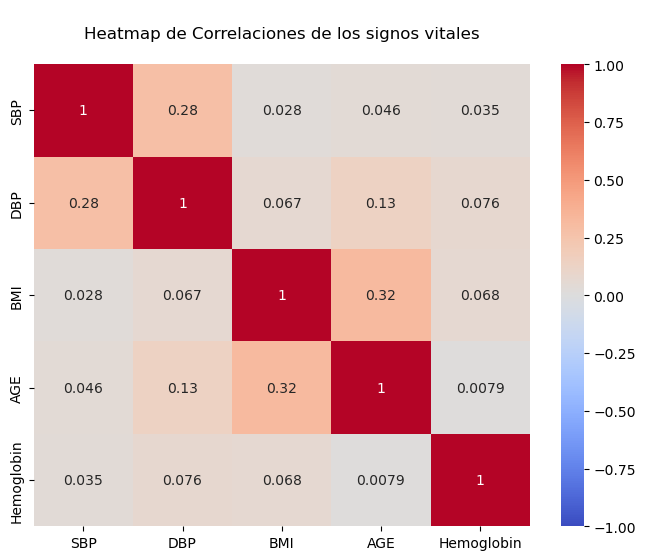

In [161]:
corr_matrix = preeclampsiahypertensivePatients[['SBP', 'DBP', 'BMI', 'AGE', 'Hemoglobin']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("\nHeatmap de Correlaciones de los signos vitales\n")
plt.show()

El heatmap indica que la presión arterial tiene una relación moderada entre sus componentes (sistólica y diastólica), mientras que la edad y el IMC también muestran una correlación moderada. Sin embargo, la hemoglobina no tiene una relación fuerte con ninguna otra variable en este conjunto de datos. Esto sugiere que, en este caso, la hemoglobina no es un predictor directo de la presión arterial o el IMC en mujeres embarazadas con preeclampsia.

In [166]:
preeclampsiahypertensivePatients.to_csv('preeclampsiahypertensivePatients.csv', index= False)